# Feature Engineering

Feature engineering is crucial because it transforms raw data into meaningful inputs for machine learning models. Good features can significantly improve model performance by highlighting relevant patterns and relationships. It helps reduce noise, handle missing or categorical data, and capture domain knowledge. In short, better features lead to better predictions.


#### Import necessary libraries and load data.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import zscore

In [79]:
df = pd.read_parquet('../data/processed/df.parquet')

## NUMERIC Variables

### Correcting the Skewness


Correcting the Skewness of the variables distribution consist of trying to get it closer to a normal distribution. Having data distributed normally improves the performance of our models. Tree based models are not sensitive to the scale of data so probably, our RF classificator will not get benefit from this. However, algorithms like Logistic Regression, Naive Bayes improve a lot when working with normally distributed data. SVM with a linear kernel also improve when they are fitted with this data since they assume the decision boundary between classes is linear. In addition, KNN algorithm, which needs to compute distances between data points also works better with normally distributed data because this distances tend to be smaller and more consistent. Having data normalized will improve the performance of our models, specially in the case of clustering algorithms, which rely on the computation  of distances, where having the data normalized is very important.

As we have seen in the EDA, AMT_CREDIT is right-skewed so we will apply a transformation to centre it.


First, lets check the distribution again.


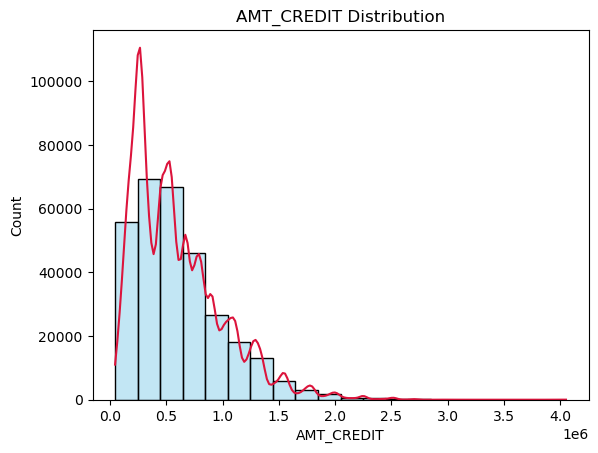

In [80]:
ax = sns.histplot(df['AMT_CREDIT'], kde=True, bins=20, color="skyblue")
ax.lines[0].set_color('crimson')
plt.title("AMT_CREDIT Distribution")
plt.show()

Now let's see the transformation


In [81]:
amt_credit_sk = skew(df['AMT_CREDIT'])
print(f"Before applying the box-cox transformation: {amt_credit_sk}")

Before applying the box-cox transformation: 1.234772474032497


We are using the Box-Cox transformation instead of the log transformation because it is better to fix skewness since it allows adjustments to find the optimal transformation.

In [82]:
df['AMT_CREDIT_BOX-COX'],lamda2 = boxcox(df['AMT_CREDIT']+1)

In [83]:
amt_credit_sk = skew(df['AMT_CREDIT_BOX-COX'])
print(f"After applying the box-cox transformation: {amt_credit_sk}")

After applying the box-cox transformation: -0.024067313943419155


Now amt_credit is almost normally distributed, since the skewness is very close to 0.


In [84]:
df['AMT_CREDIT'] = df['AMT_CREDIT_BOX-COX']
df.drop(['AMT_CREDIT_BOX-COX'], axis=1, inplace=True)

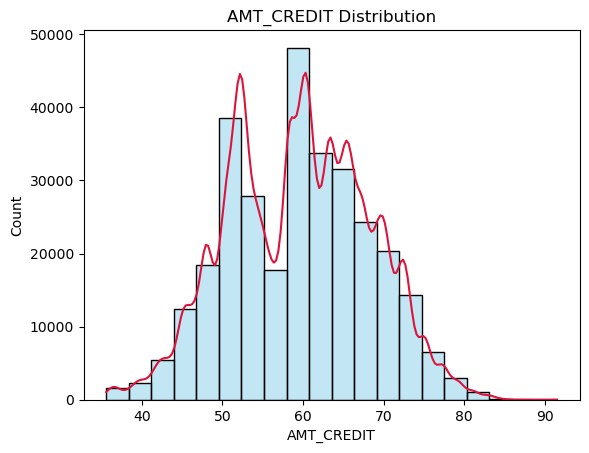

In [85]:
ax = sns.histplot(df['AMT_CREDIT'], kde=True, bins=20, color = 'skyblue')
ax.lines[0].set_color('crimson')
plt.title("AMT_CREDIT Distribution")
plt.show()


We will apply similar type of transformations to several columns

#### AMT_GOODS_PRICE

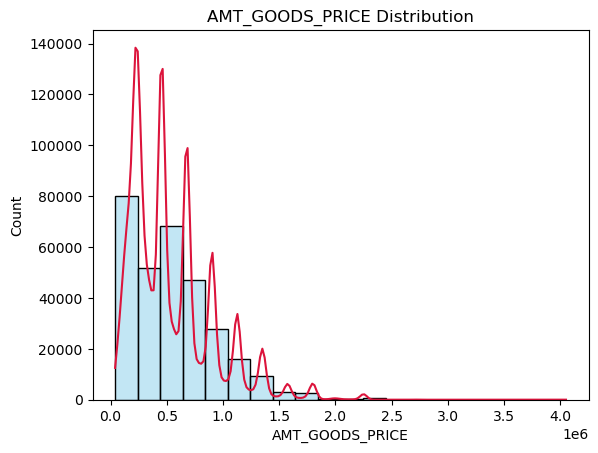

In [86]:
ax = sns.histplot(df['AMT_GOODS_PRICE'], kde=True, bins=20, color="skyblue")
ax.lines[0].set_color('crimson')
plt.title("AMT_GOODS_PRICE Distribution")
plt.show()

We are using the Box-Cox transformation instead of the log transformation because it is better to fix skewness since it allows adjustments to find the optimal transformation.

In [89]:
df['AMT_GOODS_PRICE'], lamda3 = boxcox(df['AMT_GOODS_PRICE'] + 1)

Let's visualize again the distribution

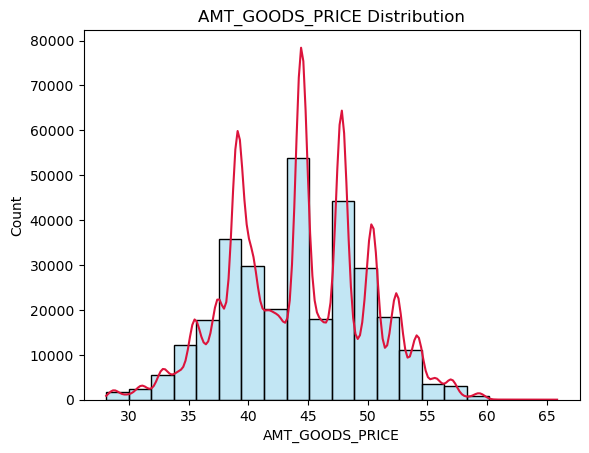

In [90]:
ax = sns.histplot(df['AMT_GOODS_PRICE'], kde=True, bins=20, color = 'skyblue')
ax.lines[0].set_color('crimson')
plt.title("AMT_GOODS_PRICE Distribution")
plt.show()

#### AMT_ANNUITY

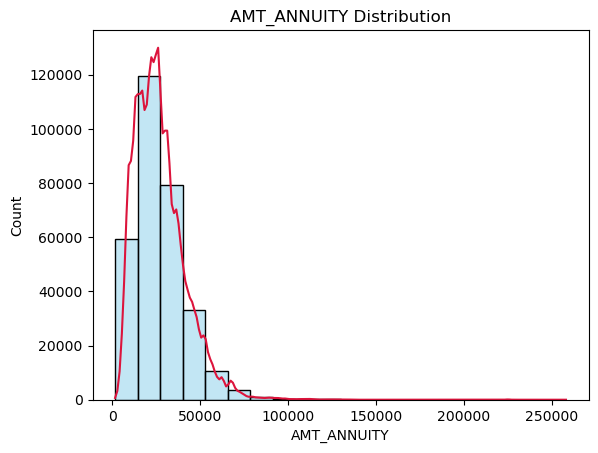

In [91]:
ax = sns.histplot(df['AMT_ANNUITY'], kde=True, bins=20, color="skyblue")
ax.lines[0].set_color('crimson')
plt.title("AMT_ANNUITY Distribution")
plt.show()

We are using the Box-Cox transformation instead of the log transformation because it is better to fix skewness since it allows adjustments to find the optimal transformation.

In [ ]:
df['AMT_ANNUITY'],lamda4 = boxcox(df['AMT_ANNUITY']+1)

Let's visualize the results

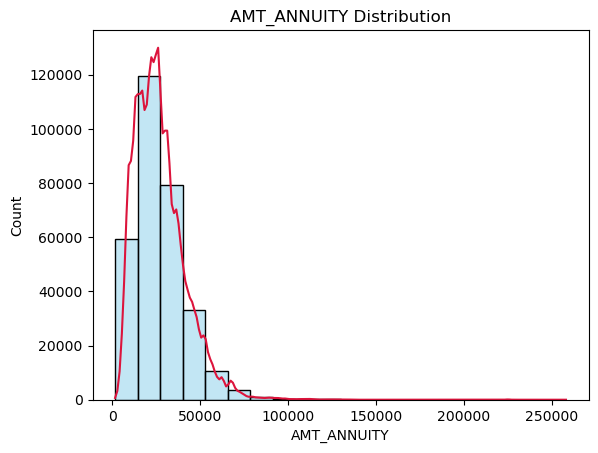

In [92]:
ax = sns.histplot(df['AMT_ANNUITY'], kde=True, bins=20, color = 'skyblue')
ax.lines[0].set_color('crimson')
plt.title("AMT_ANNUITY Distribution")
plt.show()

#### AMT_INCOME_TOTAL

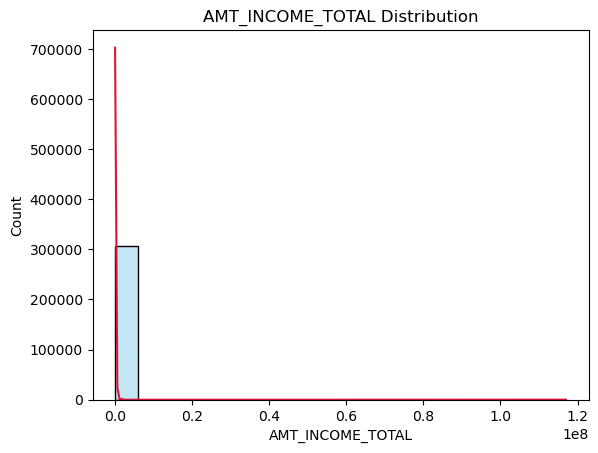

In [93]:
ax = sns.histplot(df['AMT_INCOME_TOTAL'], kde=True, bins=20, color="skyblue")
ax.lines[0].set_color('crimson')
plt.title("AMT_INCOME_TOTAL Distribution")
plt.show()

We are using the Box-Cox transformation instead of the log transformation because it is better to fix skewness since it allows adjustments to find the optimal transformation.

In [94]:
df['AMT_INCOME_TOTAL'], lamda5 = boxcox(df['AMT_INCOME_TOTAL']+1)


Let's visualize the results

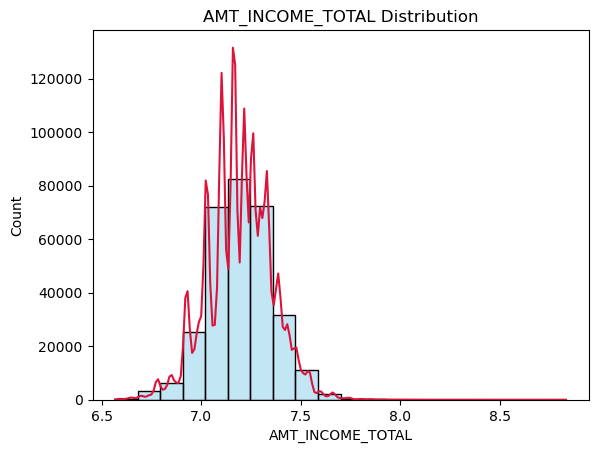

In [96]:
ax = sns.histplot(df['AMT_INCOME_TOTAL'], kde=True, bins=20, color = 'skyblue')
ax.lines[0].set_color('crimson')
plt.title("AMT_INCOME_TOTAL Distribution")
plt.show()

EXT_SOURCE_2 and EXT_SOURCE_3 are normally distributed so we will not apply any transformation to them.

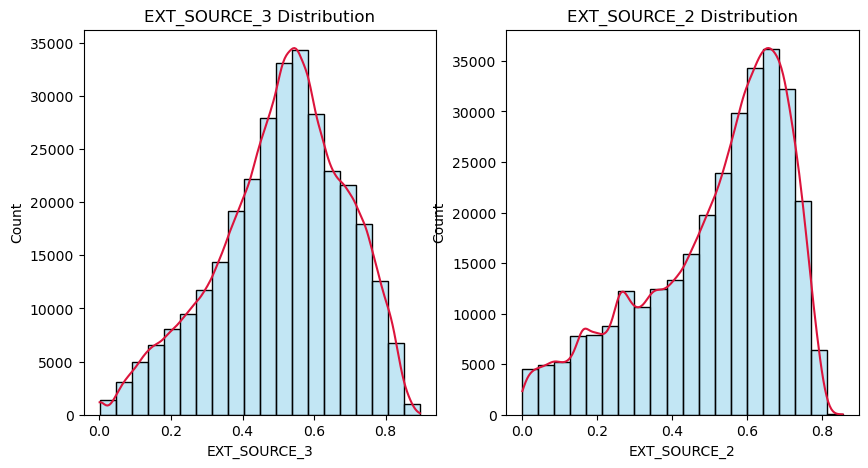

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['EXT_SOURCE_3'], kde=True, bins=20, ax=ax[0], color = 'skyblue')
ax[0].lines[0].set_color('crimson')
ax[0].set_title("EXT_SOURCE_3 Distribution")
sns.histplot(df['EXT_SOURCE_2'], kde=True, bins=20, ax=ax[1], color = 'skyblue')
ax[1].lines[0].set_color('crimson')
ax[1].set_title("EXT_SOURCE_2 Distribution")
plt.show()

## Outlier Removal

Some models such as Random Forests are not sensitive to outliers. Decision trees tend to find a split that minimizes a certain criterion and this consists in dividing the data into subsets. Since this splitting is based on a range of values and not on a particular one, outliers tend to have less impact in this process.

On the other hand, distance based algorithms, such as KNN, SVM, ... are more affected by outliers because they have a big impact on distance metrics. Logistic and linear regression are also affected because they are algorithms that try to reduce the sum of squared residuals and outliers can affect these calculations.

Firstly, we will check AMT_TOTAL_INCOME before removing outliers.


Text(0, 0.5, 'AMT_INCOME_TOTAL')

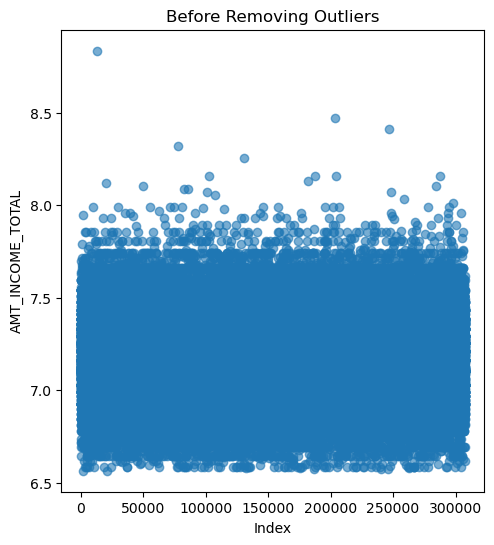

In [100]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['AMT_INCOME_TOTAL'], alpha=0.6)
plt.title("Before Removing Outliers")
plt.xlabel("Index")
plt.ylabel("AMT_INCOME_TOTAL")

Now we will remove the outliers with the z-score threshold


In [101]:
threshold = 3
zscores = zscore(df['AMT_INCOME_TOTAL'])
non_outliers = np.abs(zscores < threshold)
print(df.shape)
data_cleaned = df[non_outliers]
print(data_cleaned.shape)

(307511, 72)
(306778, 72)


We have removed 733 samples from the dataset. We will check the removal using the IQR method.


In [102]:
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
data_cleaned = df[(df['AMT_INCOME_TOTAL'] > lower) & (df['AMT_INCOME_TOTAL'] < upper)]
print(data_cleaned.shape)

(301089, 72)


Using the IQR method, the removal is of 6422 rows. However, when it comes to outlier detection, when data is normalized, zscore method works better. Since we have already corrected the skewness before, we will accept the zscore method detections. Now we will do the same for the rest of the numeric features.

We define a function for the outlier removal


In [103]:
def remove_outliers_zscore(df, columns, threshold=2.5):
    df_new = df.copy()
    for column in columns:
        if column in df_new.columns:
            z_scores = zscore(df_new[column])
            non_outliers = np.abs(z_scores) < threshold
            df_new = df_new[non_outliers]

    return df_new

In [104]:
numeric_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE']
df = remove_outliers_zscore(df, numeric_vars)
print(df.shape)

(272769, 72)


We have deleted 31276 outliers with the numeric variables.


## Categorical features


For outlier removal in categorical features we will follow the following approach. We will remove categories that appear less than 5% of the times. We will define a function that does that for each of the columns.


In [105]:
def clean_categorical_data(df, columns, threshold=0.05):
    for column in columns:
        category_counts = df[column].value_counts()
        category_percentage = category_counts / len(df) * 100
        valid_categories = category_percentage[category_percentage >= threshold].index
        df = df[df[column].isin(valid_categories)]

    return df

In [106]:
# Extract de columns we do not want to clean.
numeric_vars = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'ORGANIZATION_TYPE', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE']

categorical_features = df.drop(columns=numeric_vars).columns.tolist()
categorical_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12

In [107]:
df = clean_categorical_data(df, categorical_features)
print(df.shape)

(263024, 72)


We have deleted 9766 outliers with the categorical variables.


## Creating some new variables

Creating new variables can help us discover relationships that are not obvious in the original features. This way, we can increase our predictive power.


In [108]:
# Income and credit ratios and difference
df['INCOME_CREDIT_RATIO'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['INCOME_GOODS_RATIO'] = df['AMT_INCOME_TOTAL'] / df['AMT_GOODS_PRICE']
df['CREDIT_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df['CREDIT_GOODS_DIFF'] = df['AMT_CREDIT'] - df['AMT_GOODS_PRICE']

# Time features
df['AGE_AT_APPLICATION'] = df['DAYS_BIRTH'] / -365

# Social features
df['SOCIAL_CIRCLE_ACTIVITY'] = df['OBS_30_CNT_SOCIAL_CIRCLE'] / df['DEF_30_CNT_SOCIAL_CIRCLE']
df['SOCIAL_CIRCLE_ACTIVITY'] = df['SOCIAL_CIRCLE_ACTIVITY'].fillna(0)

# Family features
df['INCOME_PER_FAMILY_MEMBER'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']

# Fixing the df frame
df.replace([np.inf, -np.inf], 0, inplace=True)

We will check the distribution for the new variables.


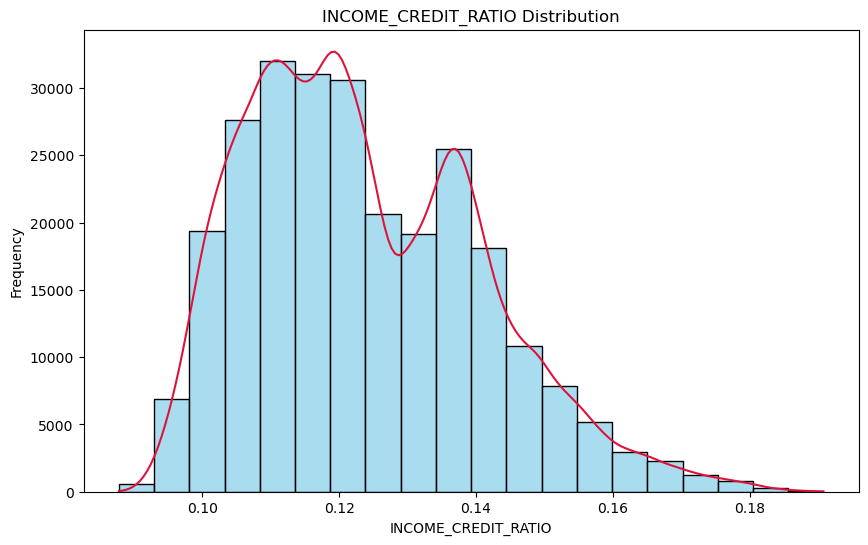

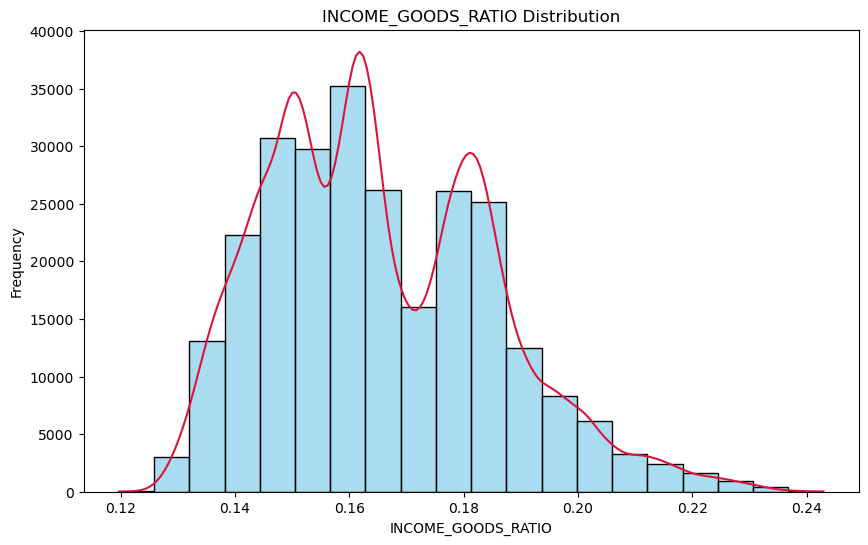

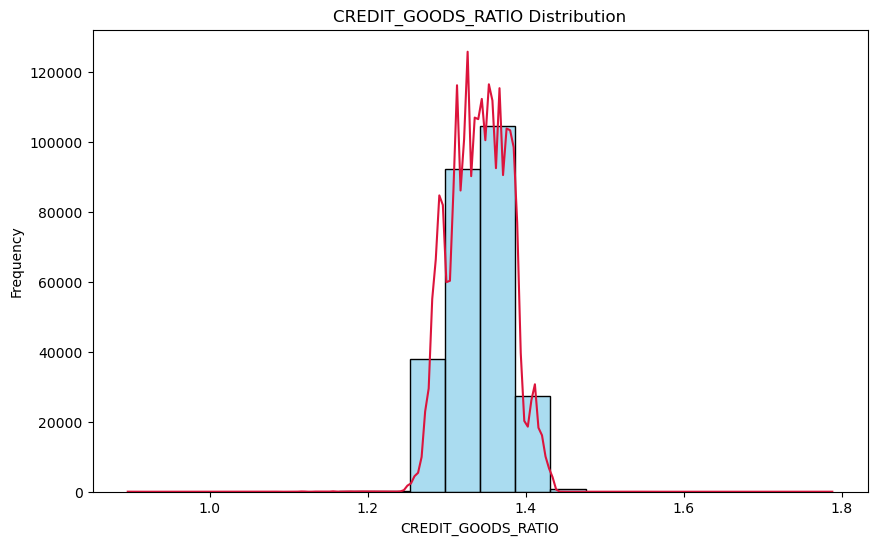

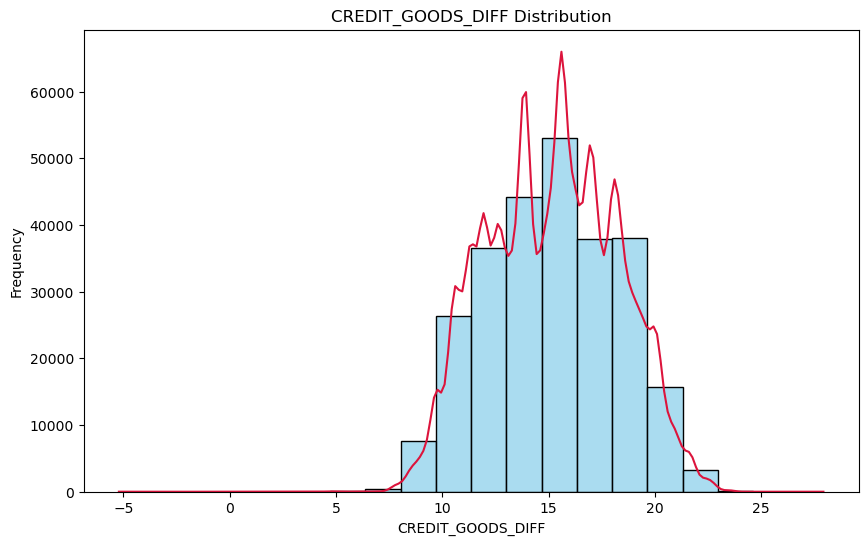

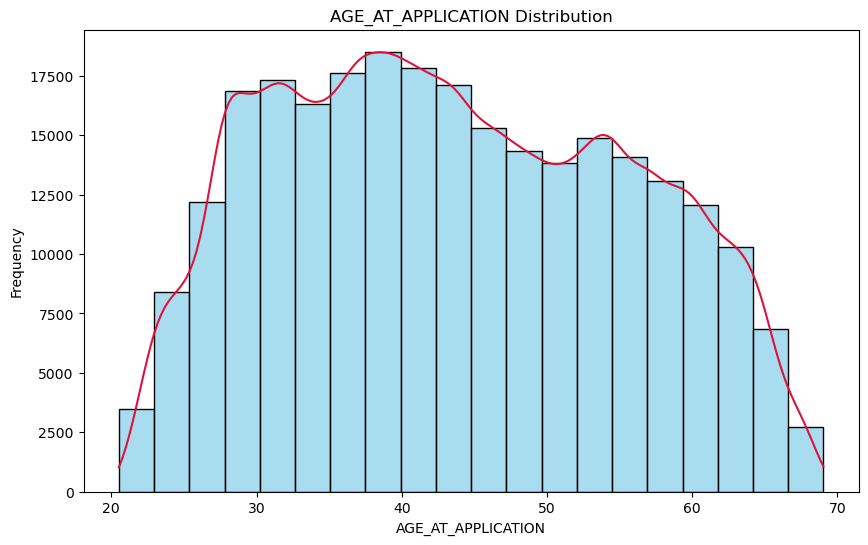

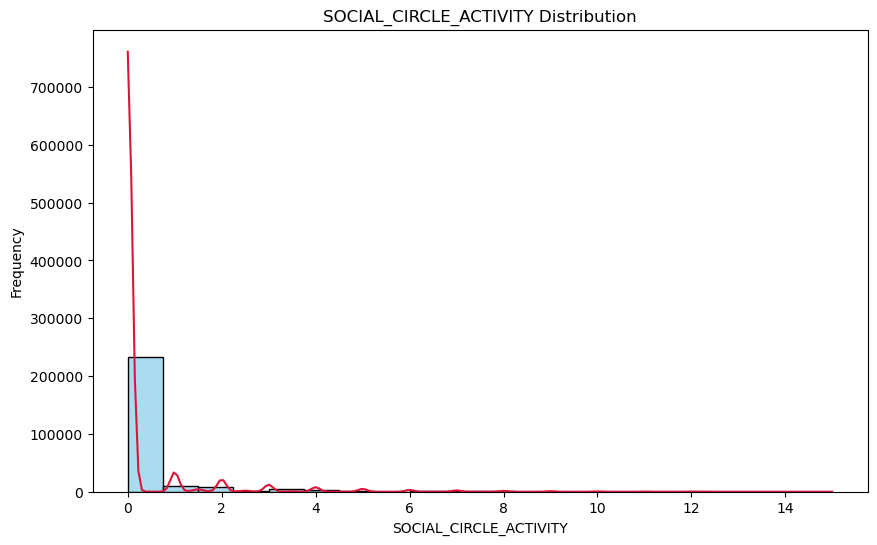

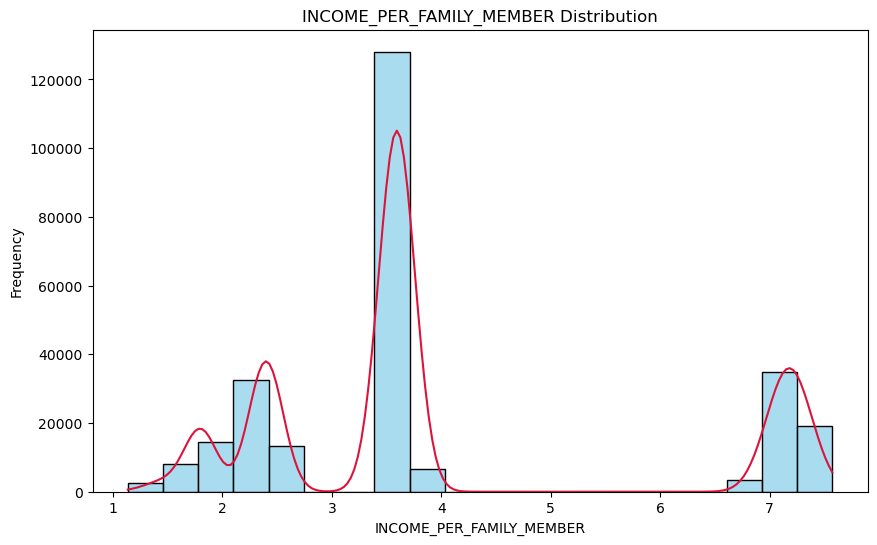

In [110]:
new_vars = ['INCOME_CREDIT_RATIO', 'INCOME_GOODS_RATIO','CREDIT_GOODS_RATIO', 'CREDIT_GOODS_DIFF', 'AGE_AT_APPLICATION',
            'SOCIAL_CIRCLE_ACTIVITY', 'INCOME_PER_FAMILY_MEMBER']
for var in new_vars:
    if var in df.columns:
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(df[var], kde=True, bins=20, color='skyblue', alpha=0.7)
        ax.lines[0].set_color('crimson')
        plt.title(f'{var} Distribution')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.show()

In [111]:
for var in new_vars:
    sk_var = skew(df[var])
    print(f"The skewness of {var} is: {sk_var}\n")

The skewness of INCOME_CREDIT_RATIO is: 0.5897894868675131

The skewness of INCOME_GOODS_RATIO is: 0.5303333033758881

The skewness of CREDIT_GOODS_RATIO is: -0.059543463281322234

The skewness of CREDIT_GOODS_DIFF is: 0.00033595472861424794

The skewness of AGE_AT_APPLICATION is: 0.13993862224445125

The skewness of SOCIAL_CIRCLE_ACTIVITY is: 5.276279443938904

The skewness of INCOME_PER_FAMILY_MEMBER is: 0.9104004965827374



As we can see some variables are right-skewed so we are going to transform them using again the Box-Cox transformation.


In [112]:
df['SOCIAL_CIRCLE_ACTIVITY'], lamda6 = boxcox(df['SOCIAL_CIRCLE_ACTIVITY'] + 1)
skew(df['SOCIAL_CIRCLE_ACTIVITY'])

np.float64(2.4046138175322525)

It is still too much right skewness but we have to leave it like that.


In [114]:
df['INCOME_PER_FAMILY_MEMBER'], lamda7 = boxcox(df['INCOME_PER_FAMILY_MEMBER'] + 1)
print(f"The new skewness for INCOME_PER_FAMILY_MEMBER is:{skew(df['INCOME_PER_FAMILY_MEMBER'])}")

The new skewness for INCOME_PER_FAMILY_MEMBER is:-0.007825913150200082


In [115]:
df['INCOME_CREDIT_RATIO'], lamda8 = boxcox(df['INCOME_CREDIT_RATIO'] + 1)
print(f"The new skewness for INCOME_PER_FAMILY_MEMBER is:{skew(df['INCOME_CREDIT_RATIO'])}")

The new skewness for INCOME_PER_FAMILY_MEMBER is:0.06122386407699842


In [116]:
df['INCOME_GOODS_RATIO'], lamda9 = boxcox(df['INCOME_GOODS_RATIO'] + 1)
print(f"The new skewness for INCOME_GOODS_RATIO is:{skew(df['INCOME_GOODS_RATIO'])}")

The new skewness for INCOME_GOODS_RATIO is:0.047592993168003646


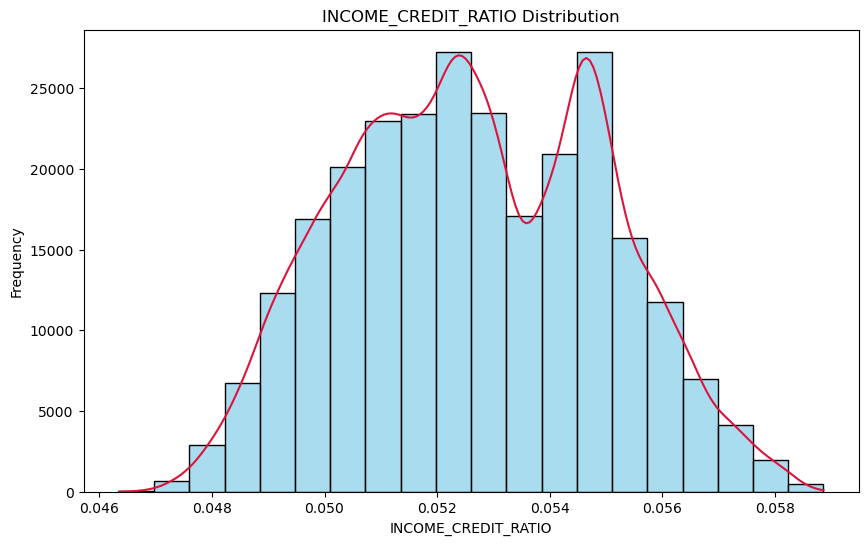

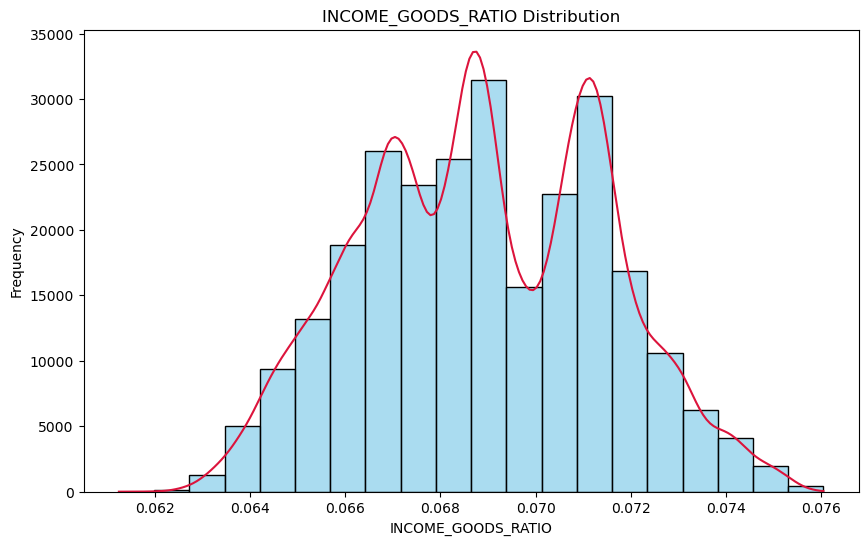

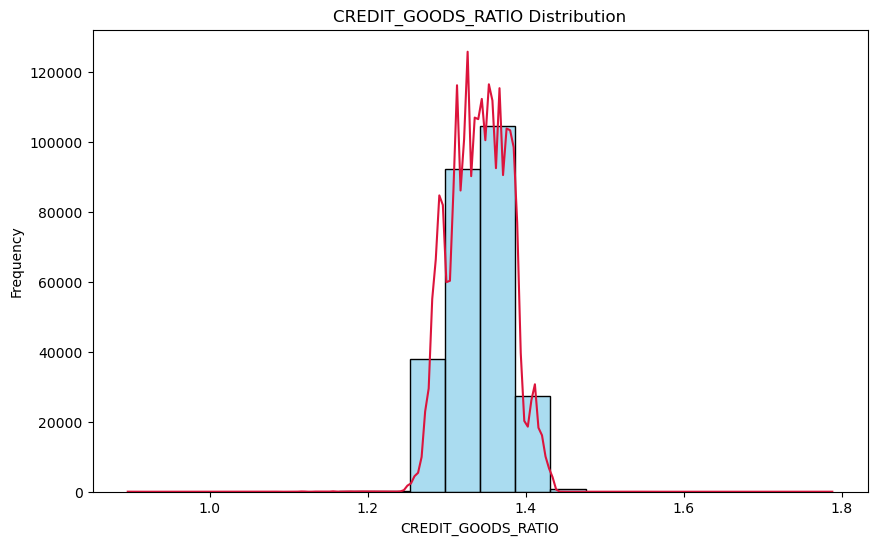

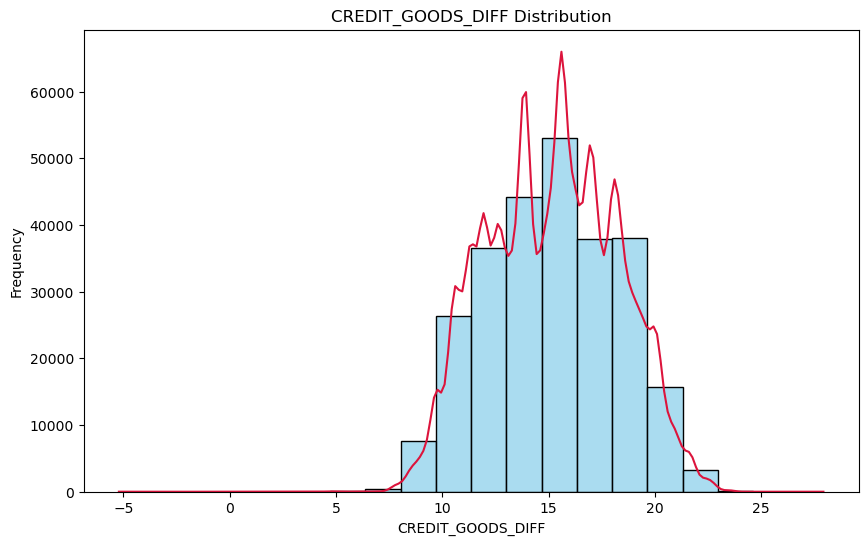

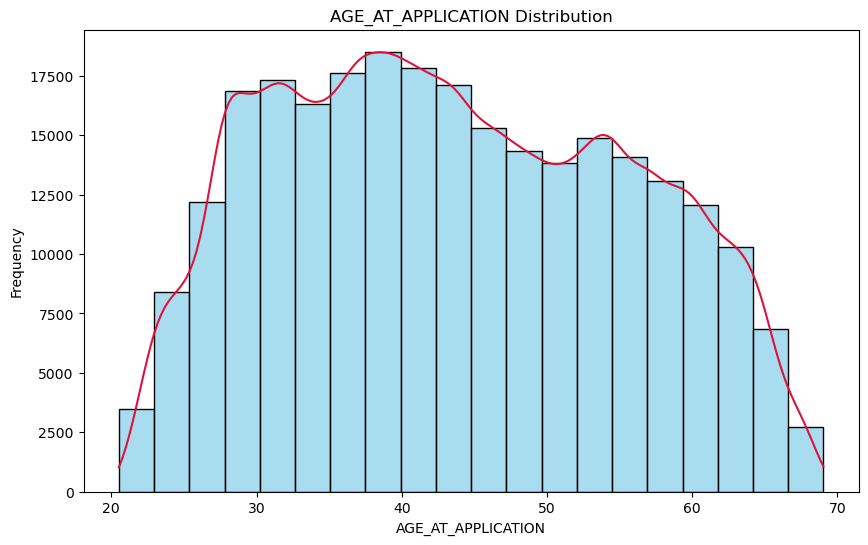

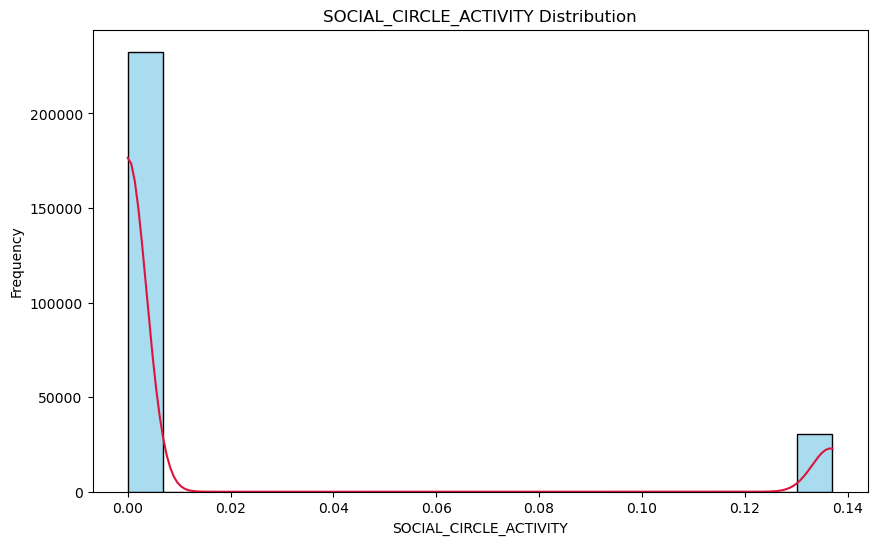

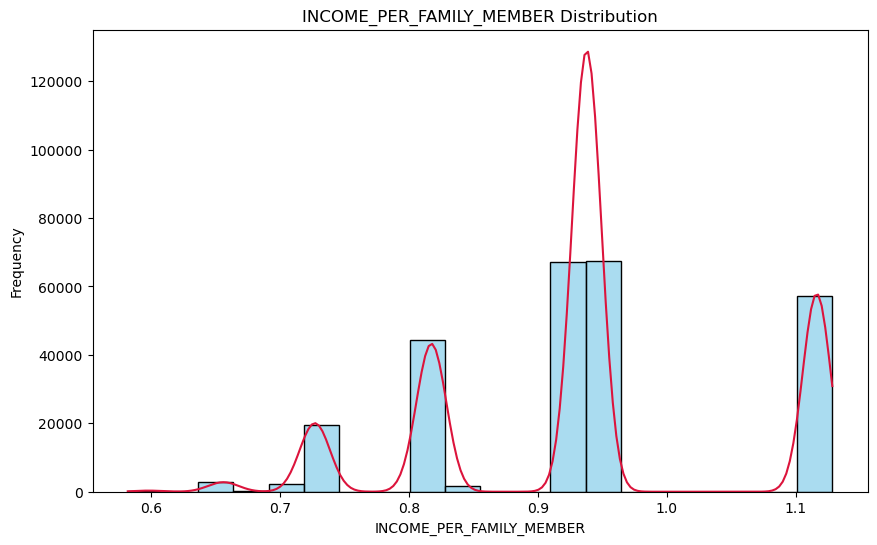

In [117]:
for var in new_vars:
    if var in df.columns:
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(df[var], kde=True, bins=20, color='skyblue', alpha=0.7)
        ax.lines[0].set_color('crimson')
        plt.title(f'{var} Distribution')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.show()

In conclusion, in the feature engineering process we have used 3 different techniques: outlier removal, feature creation and correcting the distributions. Now the numeric variables follow a normal distribution which has been achieved by applying box-cox transformation. In the case of categorical features, we have deleted the categories appearing less than in a 5% of the samples. For outlier removal we have decided to use the zscore method instead of the IQR method since we have our data normalized and this method works better with it. Finally, we have created the following features and corrected their skewness: The skewness of INCOME_CREDIT_RATIO, INCOME_GOODS_RATIO, CREDIT_GOODS_RATIO, CREDIT_GOODS_DIFF, AGE_AT_APPLICATION,SOCIAL_CIRCLE_ACTIVITY, INCOME_PER_FAMILY_MEMBER

Now we will save the df.

In [119]:
df.to_parquet('../data/processed/featured_df.parquet')